In [1]:
import datetime as dt,numpy as np,pandas as pd
from pandas import DataFrame as DF
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from django_pandas.io import read_frame
from utils import *
import os
from os.path import join
pwd=os.getcwd()

## Get Stadium Capacity from Wikipedia

In [2]:
url=r'https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums'
df=pd.read_html(url)[0]
df=df.rename(columns={'Record1':'att_record','Expanded 2':'Expanded'})
df=df.drop('Image',axis=1)
def remove_wiki_citation(df,col_list=None):
    if col_list == None:
        col_list = df.columns
    for col in col_list:
        df[col]=df[col].str.replace('[\[\d\]]]','').str.replace(r'[','')

DFC = DataFrameCleaner(df)
DFC.remove_wiki_citation()
DFC.keep_numeric_only(col_list=['Capacity','Built','Expanded'],type_coerce=np.float)
df = DFC.df

In [6]:
for tup in df.itertuples():
    stadium,c = Stadium.objects.update_or_create(
        name=tup.Stadium,
        defaults=dict(
            name=tup.Stadium,
            city=tup.City,
            state=tup.State,
            year_built=tup.Built,
            year_expanded=tup.Expanded,
            capacity=tup.Capacity,
            wiki_team_name=tup.Team,
            surface=tup.Surface
        )
    )
    print(stadium)

Aggie Memorial Stadium, Las Cruces, NM


ValueError: cannot convert float NaN to integer

In [4]:
df

,Stadium,City,State,Team,Conference,Capacity,att_record,Built,Expanded,Surface
0,Aggie Memorial Stadium,Las Cruces,NM,New Mexico State,Independent,30343.0,"32,993(September 26, 1998 vs. UTEP)",1978.0,2005.0,S5-M Synthetic Turf
1,Alamodome,San Antonio,TX,UTSA,C-USA,65000.0,"56,743(September 3, 2011 vs. Northeastern State)",1993.0,NaN,SportField
2,Alaska Airlines Field at Husky Stadium,Seattle,WA,Washington,Pac-12,70500.0,"76,125(September 23, 1995 vs. Army)",1920.0,2013.0,FieldTurf
3,Albertsons Stadium,Boise,ID,Boise State,Mountain West,36387.0,"36,864(September 20, 2012 vs. BYU)",1970.0,2012.0,Smurf Turf
4,Allen E. Paulson Stadium,Statesboro,GA,Georgia Southern,Sun Belt,25000.0,"25,735(September 17, 2016 vs. Louisiana-Monroe)",1984.0,2014.0,Shaw Legion 41 Synthetic Turf
...,...,...,...,...,...,...,...,...,...,...
125,Veterans Memorial Stadium at Larry Blakeney Field,Troy,AL,Troy,Sun Belt,30402.0,"29,013(September 15, 2012 vs. Mississippi State)",1950.0,20032018.0,ProGrass
126,Waldo Stadium,Kalamazoo,MI,Western Michigan,MAC,3020015.0,"36,361(September 16, 2000 vs. Indiana State)",193915.0,200315.0,FieldTurf
127,Warren McGuirk Alumni Stadium,Hadley,MA,UMass,Independent,17000.0,17000,1965.0,2014.0,FieldTurf
128,Wayne Day Family Field at Carter–Finley Stadium,Raleigh,NC,NC State,ACC,5758315.0,"57,583(multiple times)",1966.0,2006.0,Tifway 419 Bermuda Grass


In [10]:
path = join(pwd,'z_data\grad_rates.txt')
df=pd.read_csv(path)
df

,DATATAB_SCHOOL_INFO,SCL_UNITID,SCL_NAME,SCL_DIVISION,SCL_SUBDIVISION,SCL_CONFERENCE,DIV1_FB_CONFERENCE,SCL_HBCU,SCL_PRIVATE,DATATAB_4YR_OVERALL_FED_SA,...,FED_RATE_FEMALE_2004_SB,FED_RATE_FEMALE_2003_SB,FED_RATE_FEMALE_2002_SB,FED_RATE_FEMALE_2001_SB,FED_RATE_FEMALE_2000_SB,FED_RATE_FEMALE_1999_SB,FED_RATE_FEMALE_1998_SB,FED_RATE_FEMALE_1997_SB,FED_RATE_FEMALE_1996_SB,FED_RATE_FEMALE_1995_SB
0,NaN,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,NaN,...,41.0,33.0,38.0,42.0,42.0,43.0,41.0,46.0,45.0,51.0
1,NaN,100663,University of Alabama at Birmingham,1,1,Conference USA,Conference USA,2,0,NaN,...,44.0,43.0,42.0,40.0,39.0,37.0,41.0,42.0,42.0,41.0
2,NaN,100724,Alabama State University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,NaN,...,29.0,28.0,28.0,35.0,35.0,28.0,30.0,29.0,26.0,32.0
3,NaN,100751,University of Alabama,1,1,Southeastern Conference,Southeastern Conference,2,0,NaN,...,71.0,69.0,67.0,70.0,68.0,68.0,67.0,66.0,65.0,63.0
4,NaN,100858,Auburn University,1,1,Southeastern Conference,Southeastern Conference,2,0,NaN,...,69.0,70.0,67.0,66.0,67.0,66.0,69.0,71.0,71.0,73.0
5,NaN,101480,Jacksonville State University,1,2,Ohio Valley Conference,Ohio Valley Conference,2,0,NaN,...,39.0,42.0,42.0,46.0,43.0,40.0,42.0,44.0,43.0,48.0
6,NaN,102049,Samford University,1,2,Southern Conference,Southern Conference,2,1,NaN,...,76.0,75.0,76.0,68.0,72.0,69.0,68.0,74.0,67.0,67.0
7,NaN,102094,University of South Alabama,1,1,Sun Belt Conference,Sun Belt Conference,2,0,NaN,...,42.0,40.0,36.0,42.0,41.0,40.0,37.0,36.0,39.0,40.0
8,NaN,102368,Troy University,1,1,Sun Belt Conference,Sun Belt Conference,2,0,NaN,...,44.0,44.0,50.0,47.0,55.0,55.0,60.0,61.0,64.0,60.0
9,NaN,104151,Arizona State University,1,1,Pac-12 Conference,Pac-12 Conference,2,0,NaN,...,62.0,59.0,60.0,60.0,60.0,59.0,57.0,56.0,56.0,54.0


In [25]:
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (11, 5)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20

In [28]:
season=Season.objects.get(year=2019)
akwargs = dict(
    total_pay = F('coachpay__total'),
    record_desc = F('teamseasonrecord__desc'),
    wins = F('teamseasonrecord__win'),
    losses = F('teamseasonrecord__loss'),
    stat_cat = F('teamseasonstat__category'),
    stat_desc = F('teamseasonstat__desc'),
    stat_value = F('teamseasonstat__value'),
    stat_ovalue = F('teamseasonstat__ovalue'),
)

qs = TeamSeason.objects.filter(
    season=season
).annotate(
    **akwargs
).values(
)

df=read_frame(qs)
df['stat']=df['stat_cat']+'-'+df['stat_desc']
df=df.drop(['stat_cat','stat_desc'],axis=1)

In [36]:
df.pivot_table(index='coach_id',columns='record_desc').columns
df

,id,team_id,season_id,conference_id,coach_id,total_pay,record_desc,wins,losses,stat_value,stat_ovalue,stat
0,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,34.100000,19.800000,Scoring-PointsperGame
1,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,13.000000,13.000000,Scoring-Games
2,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,443.000000,258.000000,Scoring-Points
3,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,286.000000,216.000000,First Downs-Total
4,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,227.000000,77.000000,First Downs-Rushing
5,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,52.000000,131.000000,First Downs-Passing
6,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,7.000000,8.000000,First Downs-By Penalty
7,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,5.140000,3.490000,Rushing-Yards per Attempt
8,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,755.000000,375.000000,Rushing-Attempts
9,1,"Football, Air Force",2019,Mt. West,Troy Calhoun,885000.0,All Games,11,2,3881.000000,1307.000000,Rushing-Yards


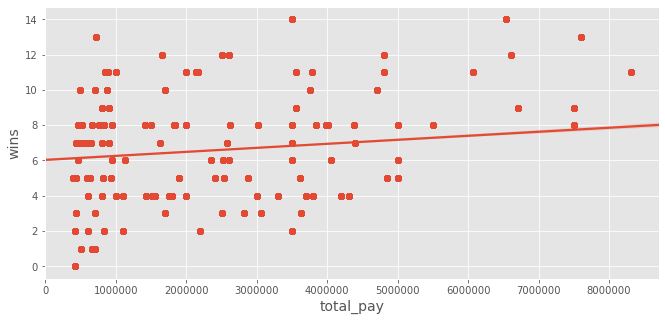

In [42]:
tdf = df[df['record_desc']=='All Games']
sns.regplot(data=tdf,x='total_pay',y='wins')

Text(0, 0.5, 'Frequency')

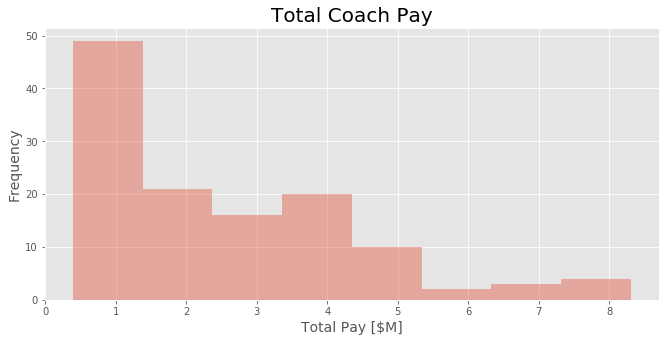

In [51]:
tdf = df.drop_duplicates('coach_id')
tdf = tdf[~pd.isna(tdf['total_pay'])]
ax=sns.distplot(tdf['total_pay']/10**6,norm_hist=False,kde=False)
ax.set_title('Total Coach Pay')
ax.set_xlabel('Total Pay [$M]')
ax.set_ylabel('Frequency')